## Bike Sharing assignment
### Reading Data
#### Imports

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

##### Reading DataSet

In [2]:
bike = pd.read_csv(r"C:\Users\nikhil-sharma\Downloads\day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Checking for Null Values

In [28]:
bike.isnull().sum()

season        0
Year          0
Month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
Humidity      0
windspeed     0
cnt           0
dtype: int64

##### Renaming Columns for Better Readability

In [8]:
bike.rename(columns={'yr':'Year','mnth':'Month','hum':'Humidity'}, inplace=True)

In [9]:
bike.describe()

,instant,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Cleaning
##### instant is just a row instance identifier.
##### dteday is removed as we have some of date features like Month and Year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
##### casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage

In [10]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Mapping the season, Month, weekday and weathersit column

In [12]:
bike.month = bike.Month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [14]:
bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,cnt
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


#### Visualizing the Data

###### Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable

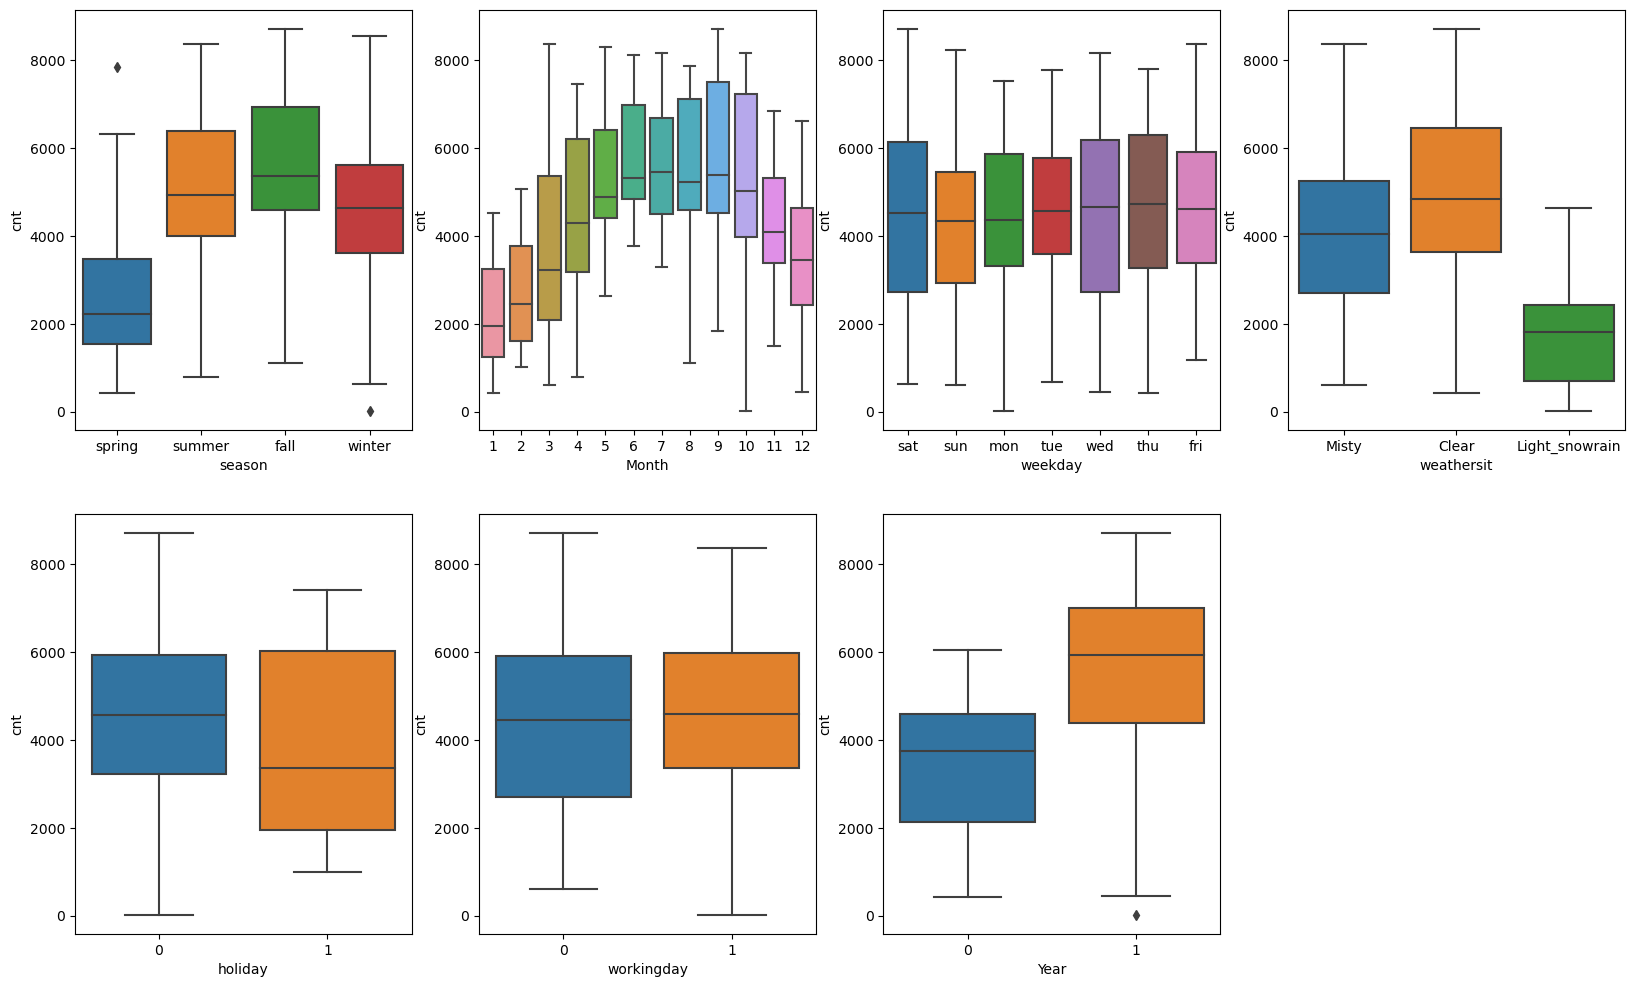

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'Month', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'Year', y = 'cnt', data = bike)
plt.show()

###### Function to create Barplot related to categorical columns

In [26]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike, hue='Year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

###### plotting visualization for season column



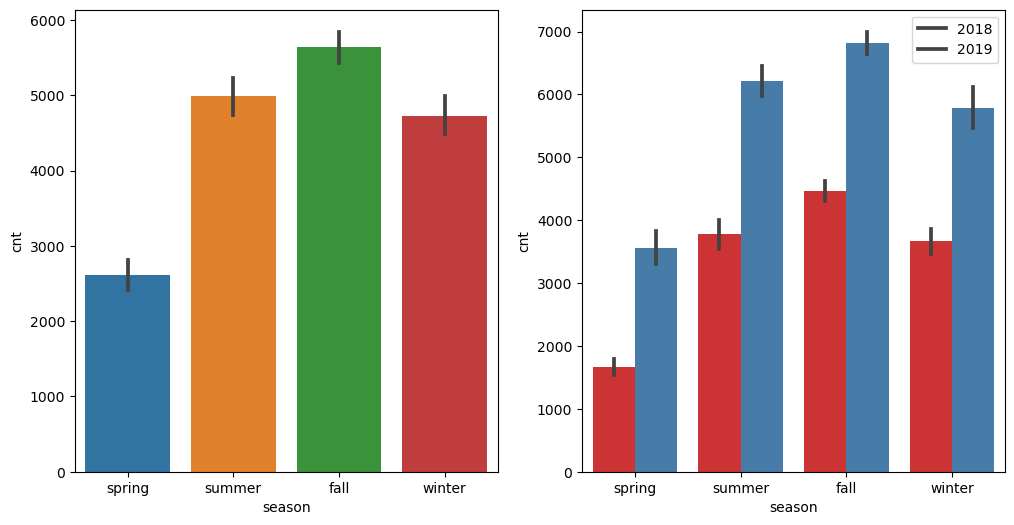

In [27]:
plot_cat_columns('season')

###### Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019

##### Visualization for Month Column

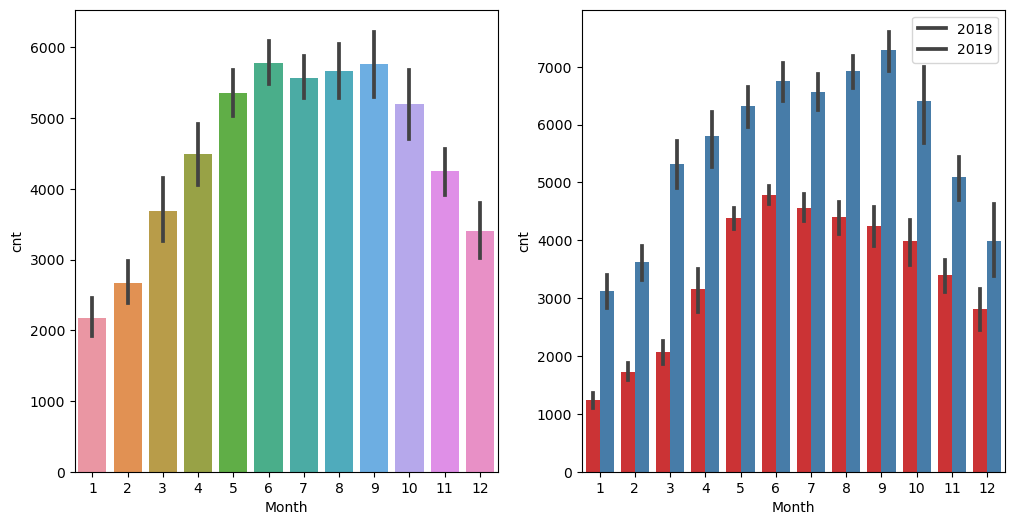

In [29]:
plot_cat_columns('Month')

##### Most of the bookings has been done in the month from May-Oct.The trend increased in the start of the year till the mid of the year and then it started decreasing as we approached the end of year. Number of bookings for each month have increased from 2018 to 2019.

##### Plotting visualization for weathersit column


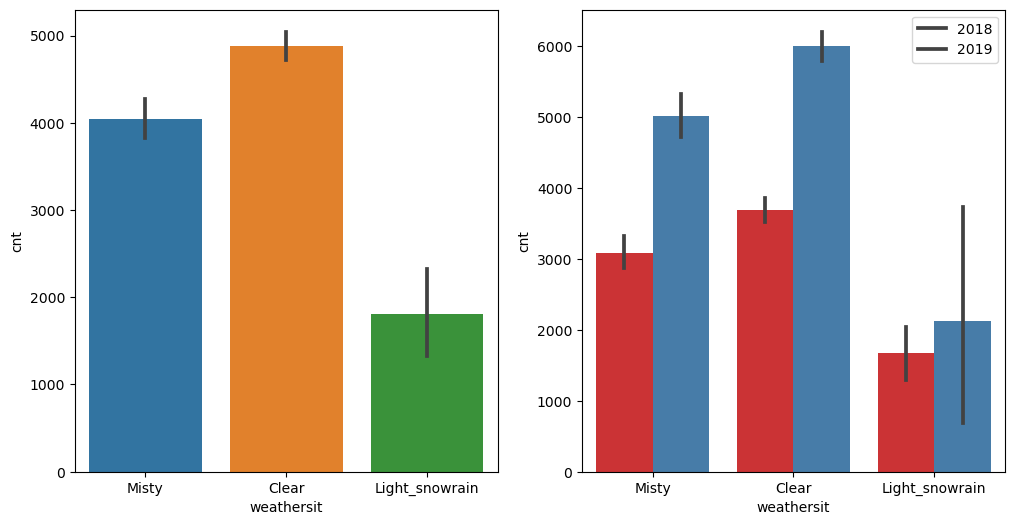

In [30]:
plot_cat_columns('weathersit')


###### Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 201

#####  Plotting visualization for weekday, holiday column

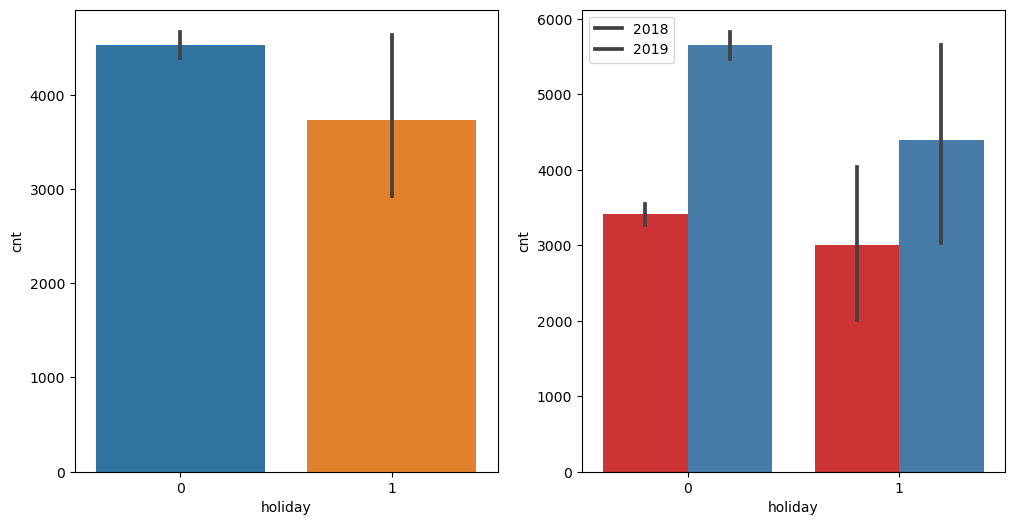

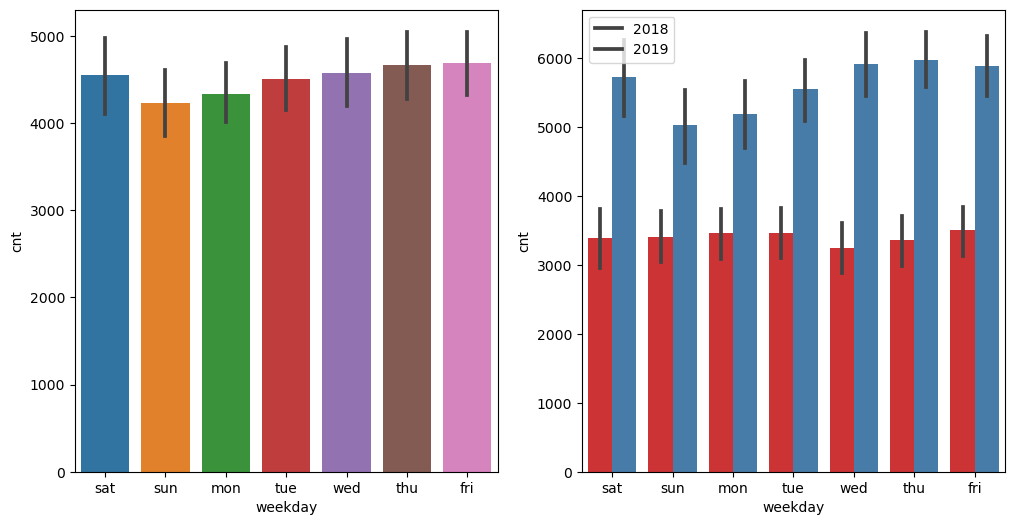

In [31]:
plot_cat_columns('holiday')
plot_cat_columns('weekday')

###### Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
######  When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

##### Plotting Visualization for Workday column

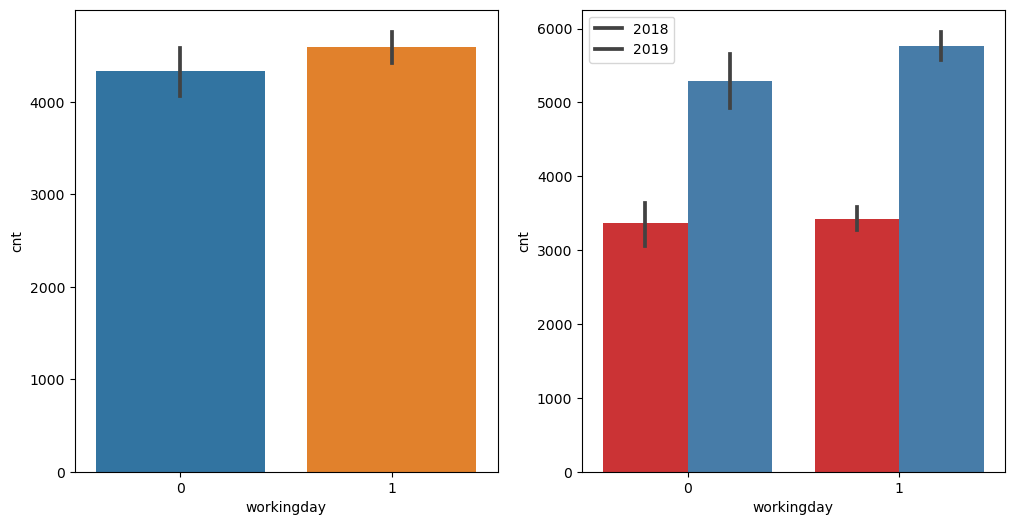

In [32]:
plot_cat_columns('workingday')

###### Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

##### Plotting visualization for Year column

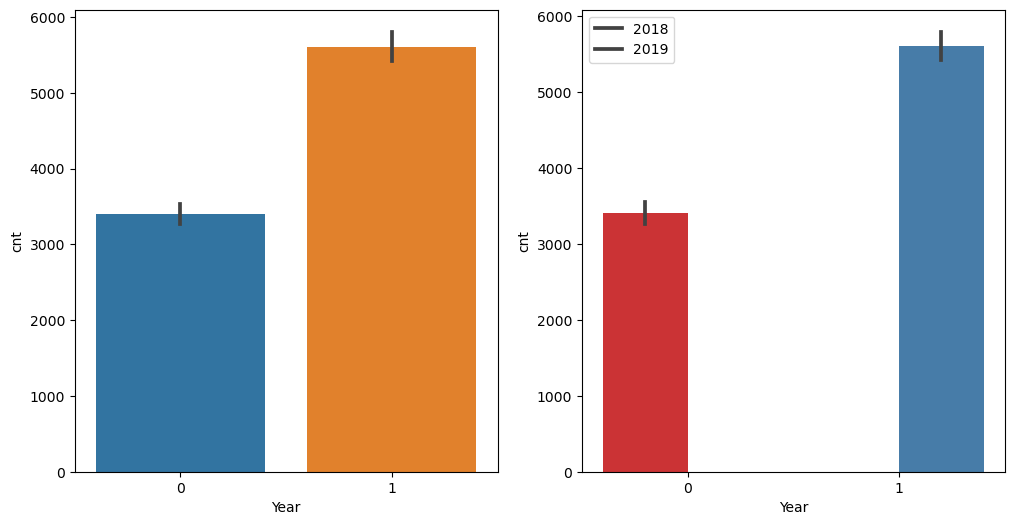

In [33]:
plot_cat_columns('Year')

###### 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

##### Analysing/visualizing the numerical columns



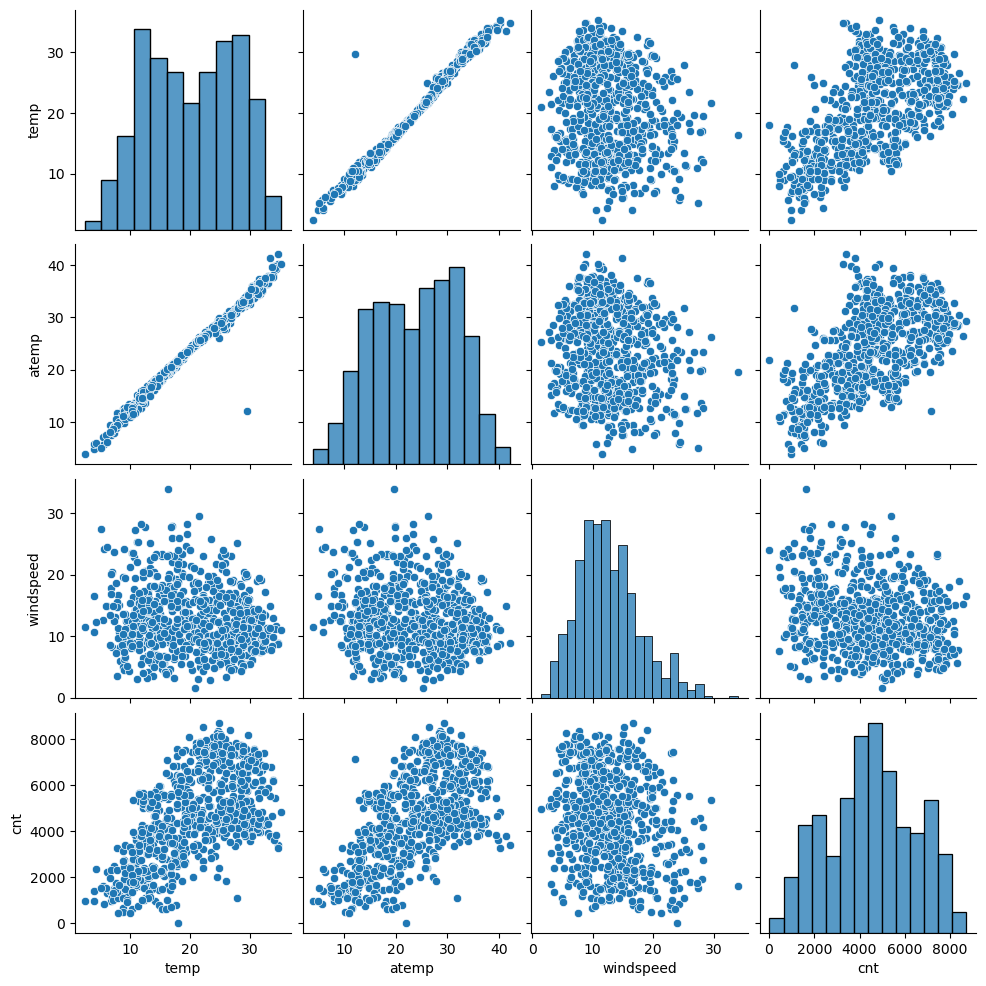

In [39]:
sns.pairplot(data=bike,vars=['temp','atemp','windspeed','cnt'])
plt.show()

## Data Preparation

##### Dummy variable creation for month, weekday, weathersit and season variables.



In [40]:
months_bike=pd.get_dummies(bike.Month,drop_first=True)
weekdays_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike.season,drop_first=True)

In [41]:
bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,cnt
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Merging  the dataframe, with the dummy variable dataset. 



In [42]:
newBike = pd.concat([bike,months_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)

In [43]:
newBike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [44]:
newBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   Year            730 non-null    int64  
 2   Month           730 non-null    int64  
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   Humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  2               730 non-null    uint8  
 13  3               730 non-null    uint8  
 14  4               730 non-null    uint8  
 15  5               730 non-null    uint8  
 16  6               730 non-null    uint8  
 17  7               730 non-null    uin

##### Dropping unnecessary columns as we have already created dummy variable out of it.



In [47]:
newBike.drop(['season','Month','weekday','weathersit'], axis = 1, inplace = True)

In [48]:
newBike.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [49]:
newBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   Humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   2               730 non-null    uint8  
 9   3               730 non-null    uint8  
 10  4               730 non-null    uint8  
 11  5               730 non-null    uint8  
 12  6               730 non-null    uint8  
 13  7               730 non-null    uint8  
 14  8               730 non-null    uint8  
 15  9               730 non-null    uint8  
 16  10              730 non-null    uint8  
 17  11              730 non-null    uin

## Splitting the Data into Training and Testing Sets

##### splitting the dataframe into Train and Test



In [52]:
np.random.seed(0)
bike_train, bike_test = train_test_split(newBike, train_size = 0.7, random_state = 100)

##### check the shape of training datatset



In [55]:
bike_train.shape

(510, 30)

##### check the shape of testing dataset

In [54]:
bike_test.shape

(220, 30)

##### Using MinMaxScaler to Rescaling the features



In [58]:
scaler = MinMaxScaler()

##### Verifying the head of dataset before scaling.



In [63]:
bike_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,70.4167,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,62.1250,0.255342,0.465255,0,1,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,48.3333,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,48.9583,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,72.9583,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


##### Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables



In [62]:
num_vars = ['temp','atemp','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

##### verifying the head after appying scaling.



In [64]:
bike_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,70.4167,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,62.1250,0.255342,0.465255,0,1,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,48.3333,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,48.9583,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,72.9583,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


##### describing the dataset



In [65]:
bike_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,63.123710,0.320883,0.513499,0.066667,0.098039,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,14.153170,0.169803,0.224421,0.249689,0.297660,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,52.270825,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,63.437500,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,73.250025,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,97.041700,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### check the correlation coefficients to see which variables are highly correlated



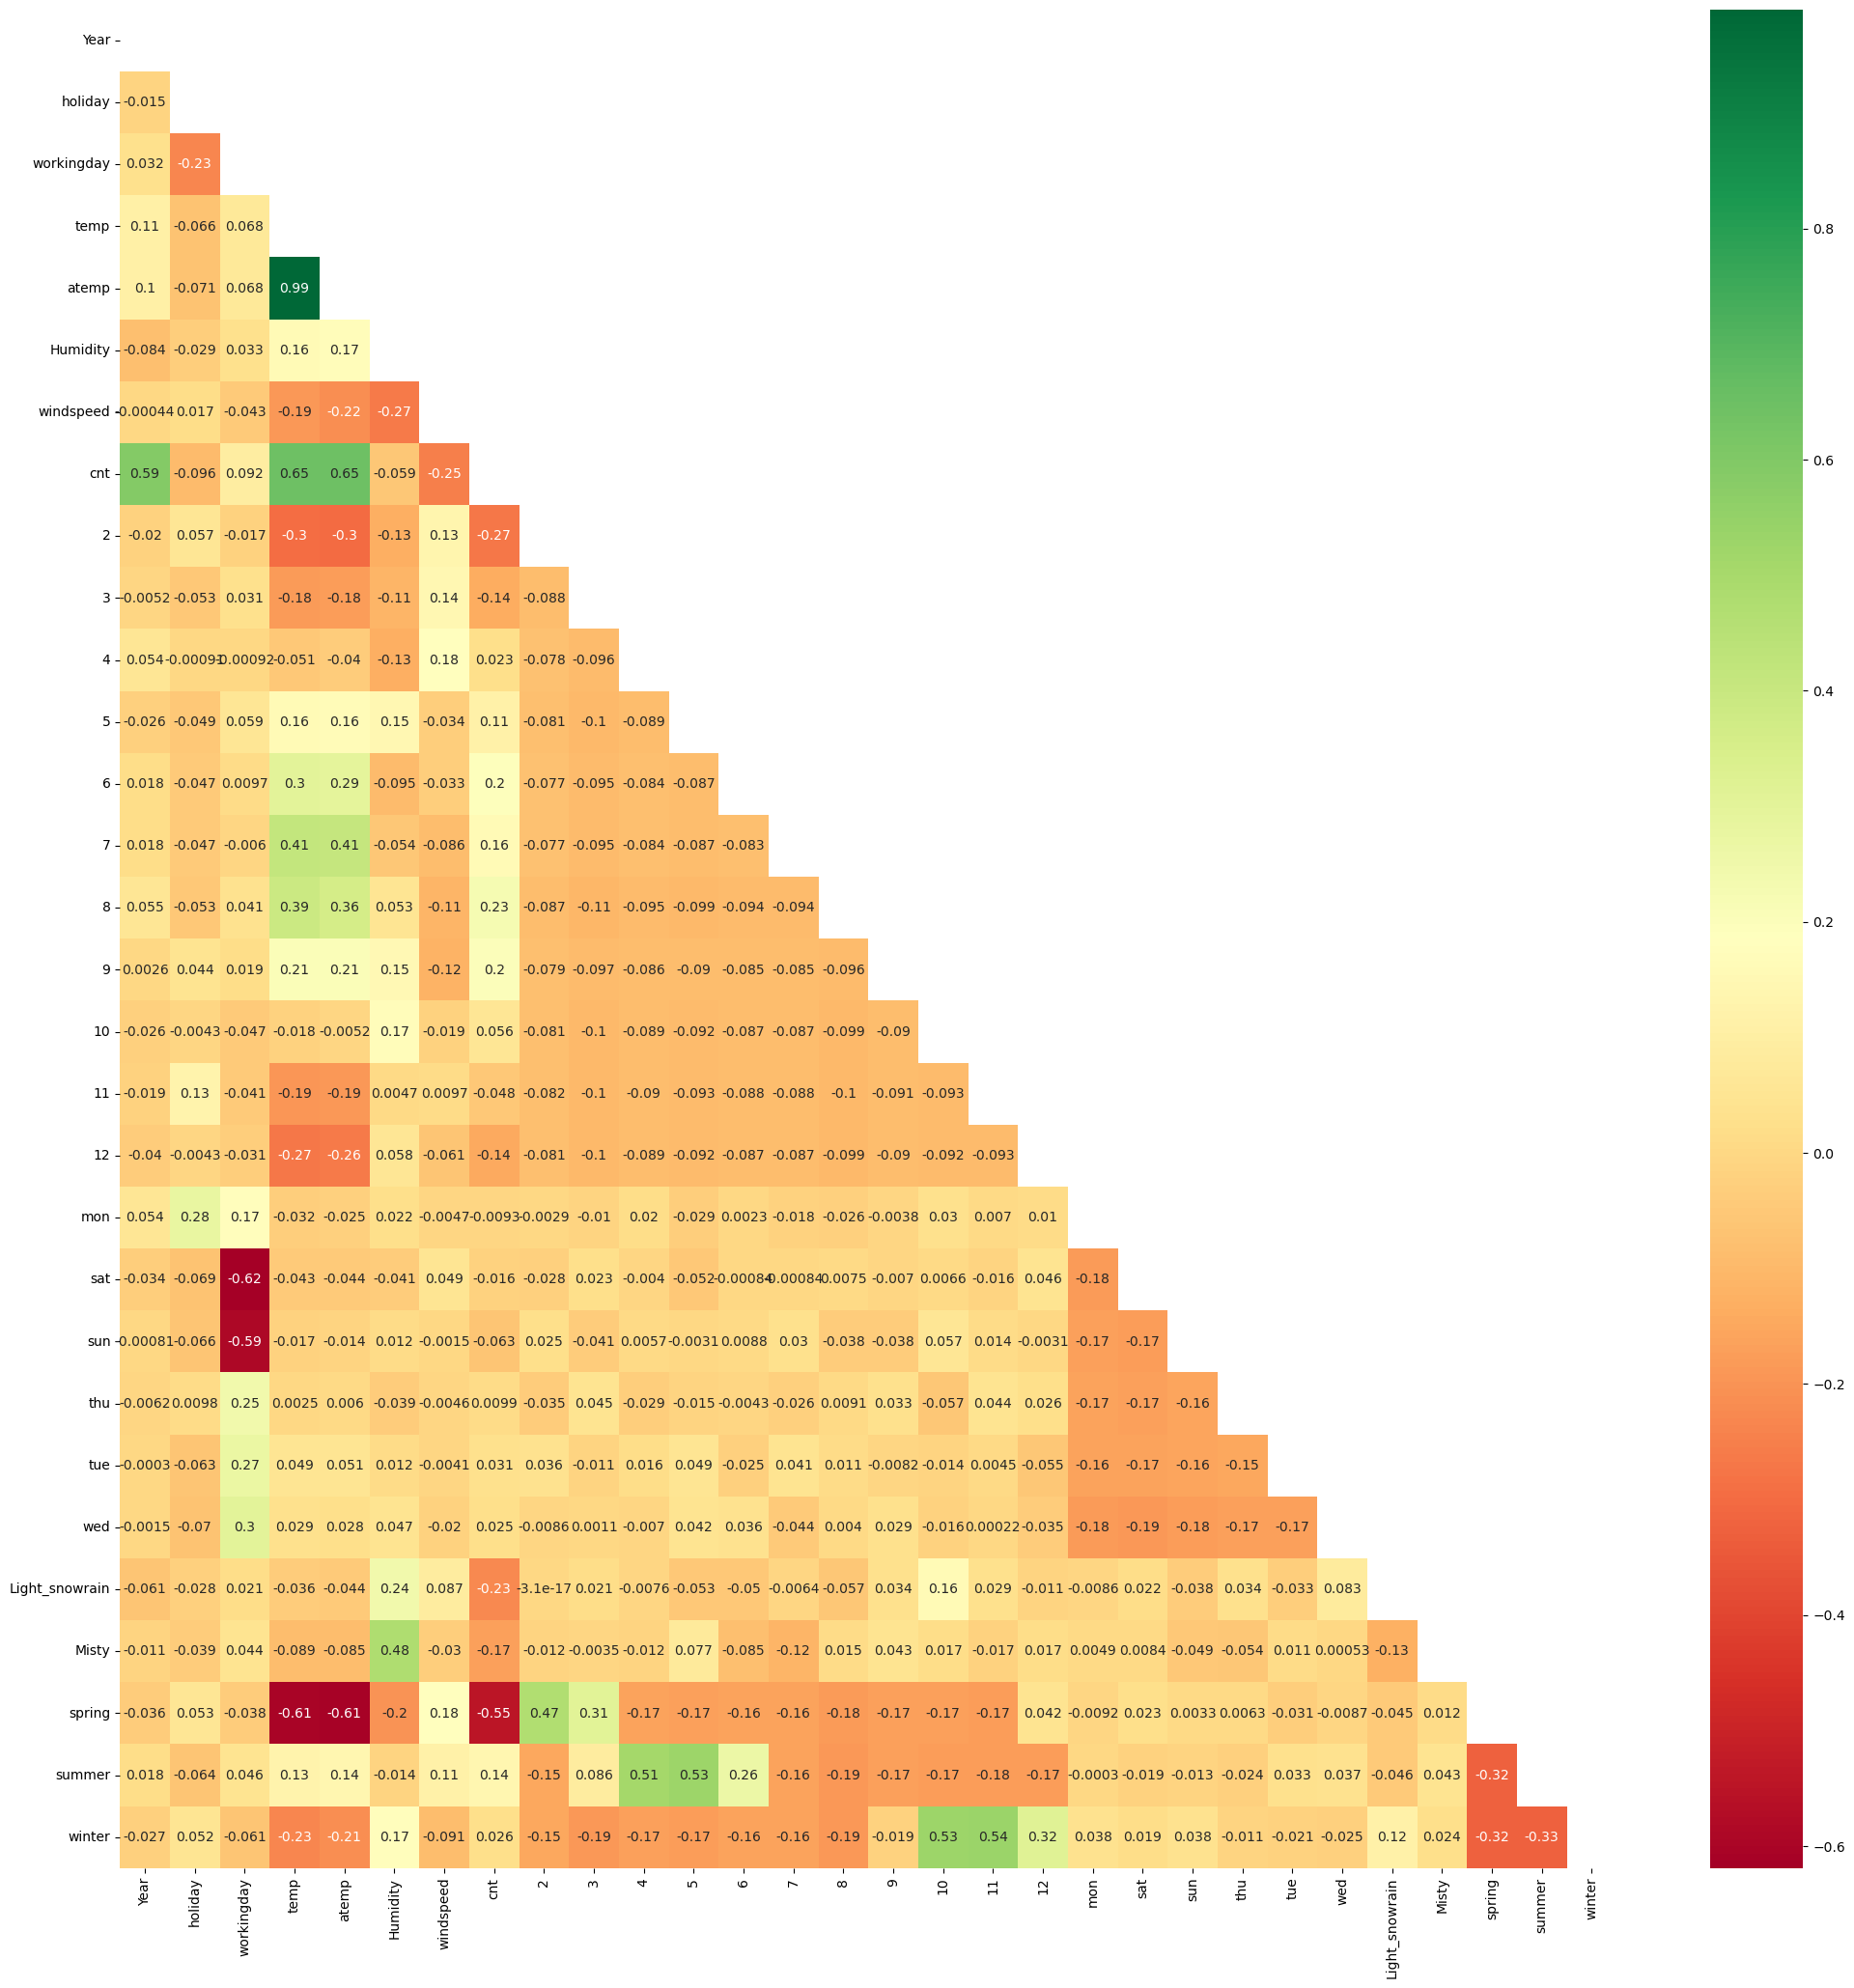

In [66]:
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

##### Visualizing one of the correlation to see the trends via Scatter plot.



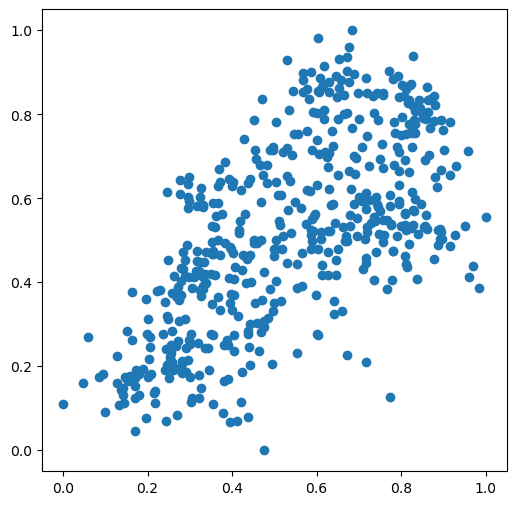

In [67]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

##### Building the Linear Model



In [73]:
y_train = bike_train.pop('cnt')
X_train = bike_train

KeyError: 'cnt'

##### Recursive feature elimination 



In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

##### List of variables selected in top 15 list



In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('Humidity', False, 15),
 ('windspeed', True, 1),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, False, 2),
 (7, False, 6),
 (8, False, 4),
 (9, True, 1),
 (10, False, 3),
 (11, False, 7),
 (12, False, 8),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1)]

##### selecting the selected variable via RFE in col list



In [77]:
col = X_train.columns[rfe.support_]
print(col)

Index([          'Year',        'holiday',     'workingday',           'temp',
            'windspeed',                3,                4,                5,
                      9,            'sat',            'sun', 'Light_snowrain',
                'Misty',         'spring',         'winter'],
      dtype='object')


In [78]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index([   'atemp', 'Humidity',          2,          6,          7,          8,
               10,         11,         12,      'mon',      'thu',      'tue',
            'wed',   'summer'],
      dtype='object')

##### Generic function to calculate VIF of variables



In [79]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [80]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

##### calculate VIF


In [81]:

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,29.56
9,sat,7.48
10,sun,7.05
13,spring,3.65
3,temp,3.09
14,winter,2.45
1,holiday,2.11
6,4,1.52
7,5,1.25
5,3,1.18


## Building a linear Model

##### Building 1st linear regression model



In [82]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          6.73e-186
Time:                        19:47:21   Log-Likelihood:                 504.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     495   BIC:                            -915.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1575      0.022      7.

##### Building 2nd linear regression model



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          6.73e-186
Time:                        20:07:19   Log-Likelihood:                 504.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     495   BIC:                            -915.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1575      0.022      7.

In [89]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,29.56
9,sat,7.48
10,sun,7.05
13,spring,3.65
3,temp,3.09
14,winter,2.45
1,holiday,2.11
6,4,1.52
7,5,1.25
5,3,1.18


In [90]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

In [91]:
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.67
2,temp,4.08
0,Year,2.08
12,spring,1.98
13,winter,1.58
11,Misty,1.54
5,4,1.33
4,3,1.28
6,5,1.25
8,sat,1.23


In [92]:
X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          6.73e-186
Time:                        20:19:59   Log-Likelihood:                 504.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     495   BIC:                            -915.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2298      0.027      8.

In [93]:
X_train_rfe = X_train_rfe.drop(['sat'], axis = 1)
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.64
2,temp,4.01
0,Year,2.08
11,spring,1.96
12,winter,1.56
10,Misty,1.54
5,4,1.33
4,3,1.28
6,5,1.25
7,9,1.20


In [94]:
X_train_lm_4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          8.16e-187
Time:                        20:30:01   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -979.8
Df Residuals:                     496   BIC:                            -920.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2324      0.027      8.

In [95]:
X_train_rfe = X_train_rfe.drop(['sun'], axis = 1)
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,Year,2.08
10,spring,1.94
9,Misty,1.54
11,winter,1.54
5,4,1.32
4,3,1.28
6,5,1.25
7,9,1.20


VIF is now below 5

In [97]:
X_train_lm_5 = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.61e-184
Time:                        20:32:47   Log-Likelihood:                 495.19
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     497   BIC:                            -909.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2255      0.027      8.

We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 206.5 (which is greater than 1) and the p-value of 2.61e-184 i.e almost equals to zero, states that the overall model is significant

## Residual Analysis of the train data and validation

In [98]:
X_train_lm_5

,const,Year,holiday,temp,windspeed,3,4,5,9,Light_snowrain,Misty,spring,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,1,0,0,0,0,1,0,0


In [99]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

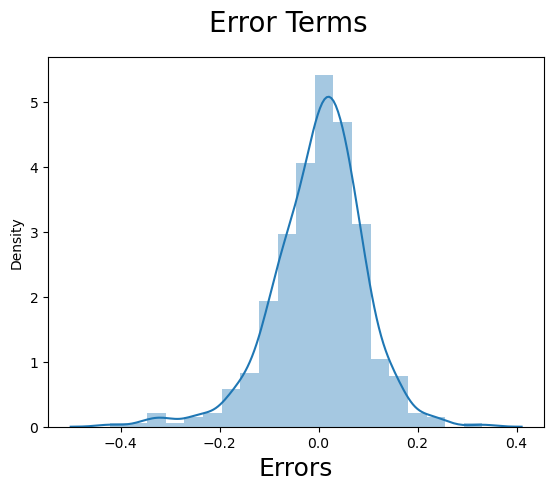

In [100]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [101]:
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,Year,2.08
10,spring,1.94
9,Misty,1.54
11,winter,1.54
5,4,1.32
4,3,1.28
6,5,1.25
7,9,1.20


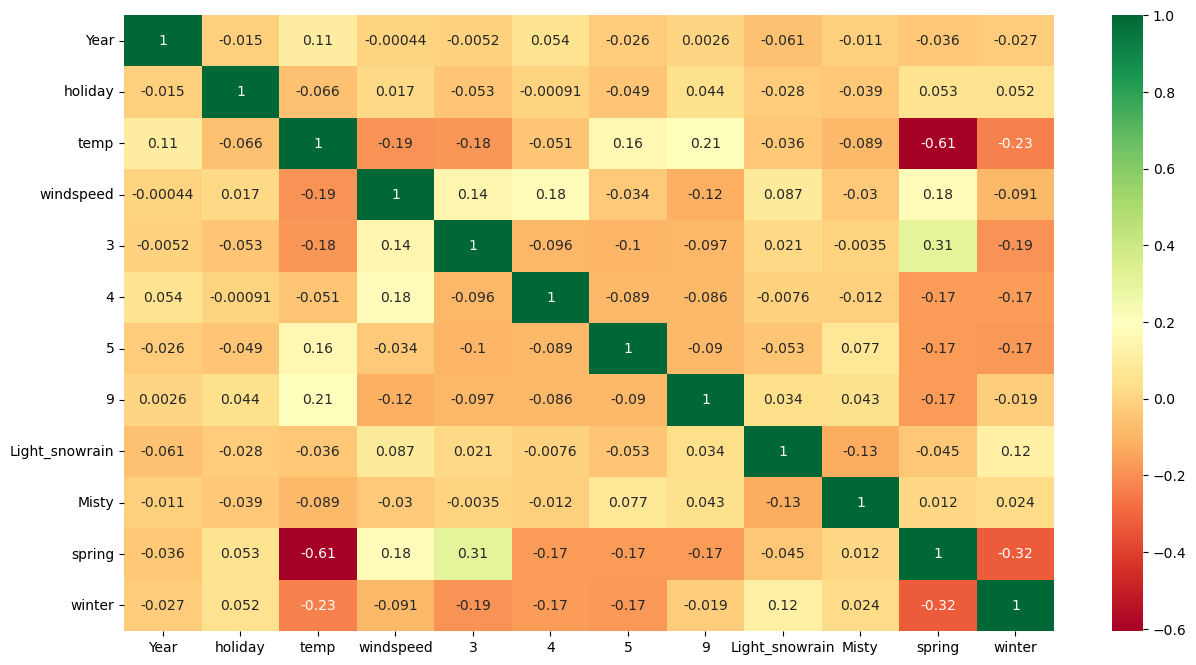

In [103]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

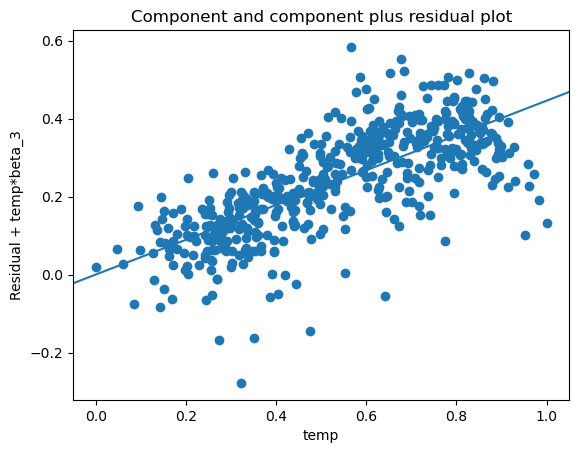

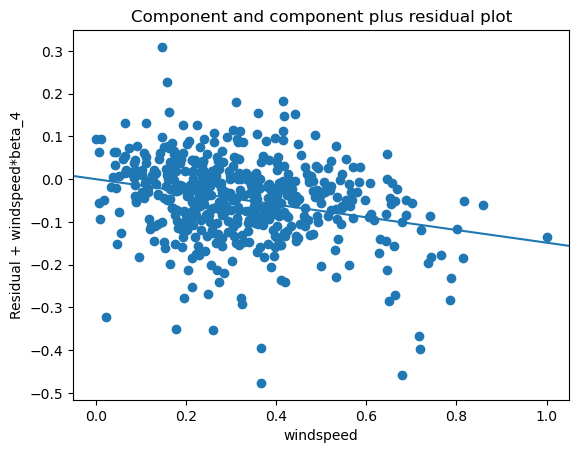

In [106]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()


sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

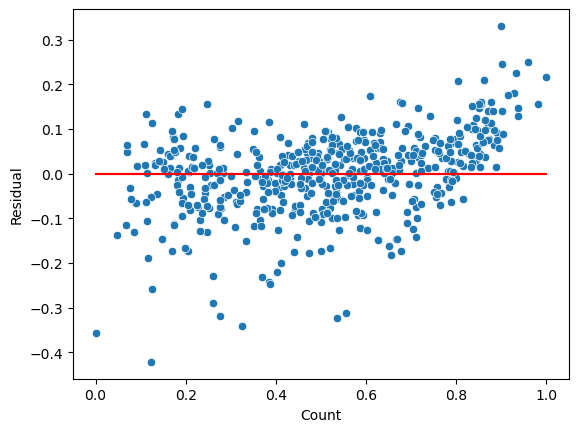

In [107]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Making Predictions Using the Final Model

In [108]:
num_vars = ['temp', 'atemp', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,63.7917,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,59.2083,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,81.2917,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,42.4167,0.339570,0.547400,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,30.5000,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [109]:
df_test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,2,3,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,61.934025,0.313293,0.522154,0.100000,0.054545,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,14.429542,0.159584,0.219163,0.300684,0.227609,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,25.416700,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,51.354200,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,60.708350,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,72.179375,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,97.250000,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
y_test = df_test.pop('cnt')
X_test = df_test

In [112]:
col1 = X_train_rfe.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [113]:
y_pred = lr_5.predict(X_test_lm_5)

In [114]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.808

## Model Evaluation

Text(0, 0.5, 'y_pred')

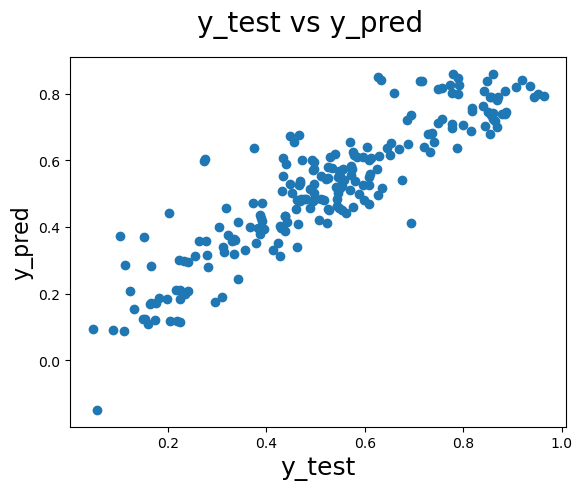

In [115]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [116]:
round(lr_5.params,4)

const             0.2255
Year              0.2347
holiday          -0.0917
temp              0.4459
windspeed        -0.1486
3                 0.0491
4                 0.0415
5                 0.0529
9                 0.0827
Light_snowrain   -0.2882
Misty            -0.0787
spring           -0.0935
winter            0.0745
dtype: float64

In [117]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7969


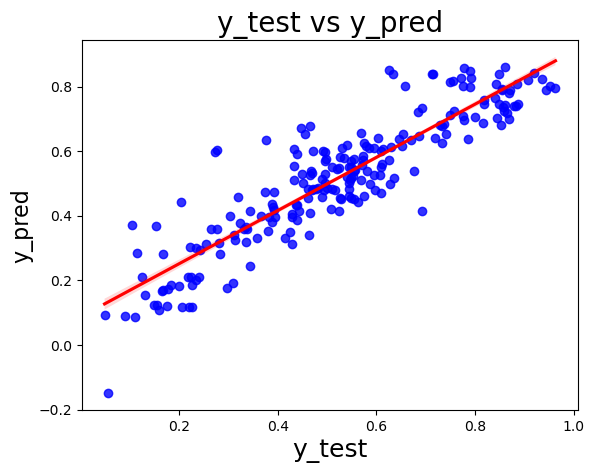

In [118]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.808
- Train dataset Adjusted R^2 : 0.834    
- Test dataset Adjusted R^2  : 0.7969

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.